In [47]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['ja-nlp', 'chinesewordcloud', 'shinzo-abe-japanese-prime-minister-twitter-nlp']


In [48]:
import openpyxl

In [49]:
import os
import re
import pkg_resources, imp
imp.reload(pkg_resources)
import numpy as np
import pandas as pd
import spacy
from matplotlib import pyplot as plt
import regex
from wordcloud import WordCloud
import collections
# use janome tokenizer
import itertools
import unicodedata
from janome.tokenizer import Tokenizer
import networkx as nx
from scipy.spatial import distance
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Droid Sans Japanese'

In [50]:
import os
os.getcwd()
print(os.getcwd())

/kaggle/working


In [51]:
# Load the dataset into a pandas dataframe.
import pandas as pd
# df = pd.read_csv("./cola_public/raw/in_domain_train.tsv", delimiter='\t', header=None, names=['sentence_source', 'label', 'label_notes', 'sentence'])
# col_list=[10,11,15,16]
# df = pd.read_excel("/kaggle/input/ja-nlp/ja_slide9_data.xlsx", usecols=col_list,names=['sentence1','sentence2','sentence3','sentence4'])
col_list=[15]
df = pd.read_excel("/kaggle/input/ja-nlp/ja_slide9_data.xlsx", usecols=col_list,names=['sentence'])
# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(df.shape[0]))

# Display 10 random rows from the data.
df.sample(5)

Number of training sentences: 132



,sentence
60,他剤との違いについて
110,なし
25,抗コリンとβ3の使い分けでTOVのお役に立てる症例には女性を意識させたほうがいいのではと感じ...
67,UUIの示せる国内データが欲しい
76,製品の情報提供ができているため、しっかりクロージング、処方依頼を強化したい。


In [52]:
tweets = df['sentence'].as_matrix()
# tweets=df['sentence1'].as_matrix()+df['sentence2'].as_matrix()+df['sentence3'].as_matrix()+df['sentence4'].as_matrix()
# tweets = df['sentence1'].as_matrix()
regex = u'[^\u3041-\u3093\u30A1-\u30F4\u4E00-\u9FCB]'
t = Tokenizer()

tweet_words = []
for tweet in tweets:
    tweet = re.sub(regex, ' ', tweet)
    words = []
    for token in t.tokenize(tweet):
        speechs = token.part_of_speech.split(',')
        if ('名詞' in speechs) or ('形容詞' in speechs) or ('動詞' in speechs):
            if len(token.surface) > 1:
                words.append(token.surface)
    tweet_words.append(words)

len(tweet_words)

132

### one-unit word frequency

In [53]:
word_cnt = {}
for words in tweet_words:
    for word in words:
        if word not in word_cnt:
            word_cnt[word] = 1
        else:
            word_cnt[word] += 1
    
word_cnt_df = pd.DataFrame({'word': [k for k in word_cnt.keys()], 'cnt': [v for v in word_cnt.values()]})
len(word_cnt_df)

350

In [54]:
word_cnt_df.head(5)

,cnt,word
0,1,ベタニスベオ
1,1,学ぶ
2,13,なし
3,5,理解
4,1,継続


In [55]:
word_cnt_df[['cnt']].describe()

,cnt
count,350.000000
mean,2.008571
std,2.346108
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,18.000000


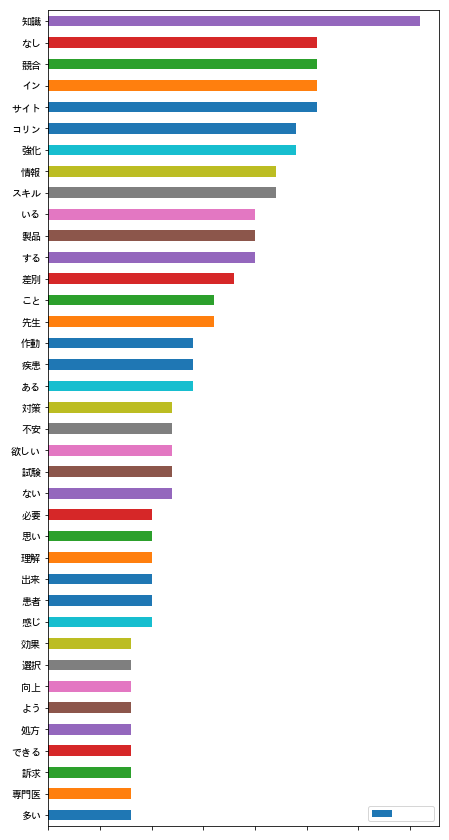

In [56]:
tmp = word_cnt_df[word_cnt_df['cnt'] > 3]
# tmp.sort_values(by='cnt', ascending=False).plot(kind='bar', x='word', y='cnt',z legend=False)
tmp.sort_values(by='cnt', ascending=True).plot.barh( x='word', y='cnt',figsize=(7,15))
plt.show()

### two-unit word frequency

In [57]:
# tweet_words
def flatten_list(_2d_list):
    flat_list = []
    # Iterate through the outer list
    for element in _2d_list:
        if type(element) is list:
            # If the element is of type list, iterate through the sublist
            for item in element:
                flat_list.append(item)
        else:
            flat_list.append(element)
    return flat_list

one_word_list=flatten_list(tweet_words)
# print(one_word_list)

In [58]:
from itertools import permutations
# list_test=keysList
word_2=permutations(one_word_list,2)
two_unit_list = [''.join(i) for i in word_2]
# print(two_unit_list)

In [59]:
sentences = df.sentence.values
# print(sentences[5])
col15_sentence=[]
for sen in sentences:
    col15_sentence.append(sen)
col15_sentence_text='.'.join(col15_sentence)

def unit2_dictionary(str,word_list):
    counts = dict()
    for word in word_list:
        dic=str.count(word)
        # counts[word] =dic
        if dic!=0:
            counts[word] =dic
    return counts
unit2_dic=unit2_dictionary(col15_sentence_text,two_unit_list)
# print(unit2_dic)

In [60]:
dict1 = unit2_dic
sorted_dict = {}
sorted_keys = sorted(dict1, key=dict1.get,reverse=True)  # [1, 3, 2]

for w in sorted_keys:
    sorted_dict[w] = dict1[w]

# print(sorted_dict) 

In [61]:
two_word_cnt_df = pd.DataFrame({'two_word': [k for k in sorted_dict.keys()], 'two_word_freq': [v for v in sorted_dict.values()]})
len(two_word_cnt_df)
two_word_cnt_df.head(8)

,two_word,two_word_freq
0,インサイト,13
1,製品知識,5
2,患者さん,3
3,いる先生,2
4,すること,2
5,臨床試験,2
6,活動膀胱,2
7,出来るよう,2


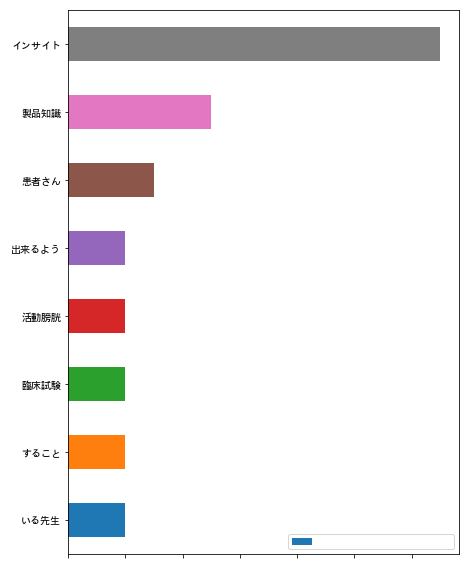

In [62]:
tmp2 = two_word_cnt_df[two_word_cnt_df['two_word_freq'] > 1]
# tmp2.sort_values(by='two_word_freq', ascending=False).plot(kind='bar', x='two_word', y='two_word_freq', figsize=(15,7), legend=False)
tmp2.sort_values(by='two_word_freq', ascending=True).plot.barh( x='two_word', y='two_word_freq',figsize=(7,10),legend=True)
plt.show()

In [63]:
import nltk

word_data = "The best performance can bring in sky high success."
nltk_tokens = nltk.word_tokenize(word_data)  	

print(list(nltk.bigrams(nltk_tokens)))

[('The', 'best'), ('best', 'performance'), ('performance', 'can'), ('can', 'bring'), ('bring', 'in'), ('in', 'sky'), ('sky', 'high'), ('high', 'success'), ('success', '.')]


In [64]:
# one_word_list
bigrams=list(nltk.bigrams(one_word_list))
# print(list(nltk.bigrams(one_word_list)))
# bigrams

In [65]:
bigram_counts = collections.Counter(bigrams)
bigram_counts.most_common(20)

[(('イン', 'サイト'), 13),
 (('競合', '情報'), 7),
 (('製品', '知識'), 6),
 (('サイト', '深堀'), 3),
 (('患者', 'さん'), 3),
 (('疾患', '知識'), 3),
 (('深堀', '重要'), 2),
 (('出来', 'いる'), 2),
 (('トレ', 'ニング'), 2),
 (('必要', '感じ'), 2),
 (('コリン', '選択'), 2),
 (('いる', '先生'), 2),
 (('知識', '強化'), 2),
 (('臨床', '試験'), 2),
 (('復習', '思い'), 2),
 (('ない', 'コリン'), 2),
 (('ある', '感じ'), 2),
 (('スキル', '強化'), 2),
 (('強化', '競合'), 2),
 (('言っ', '症例'), 2)]

In [66]:
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')

# d[0]
# k[0]

In [67]:
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

In [68]:
# G.nodes()

In [69]:
# for (n,d) in G.nodes(data=True):
#     print(n)
#     print(type(n))

In [70]:
# for (n,d) in G.nodes(data=True):
#     print(one_word_list.count(n))

In [71]:
# for (n,d) in G.nodes(data=True):
#     print(n,d)

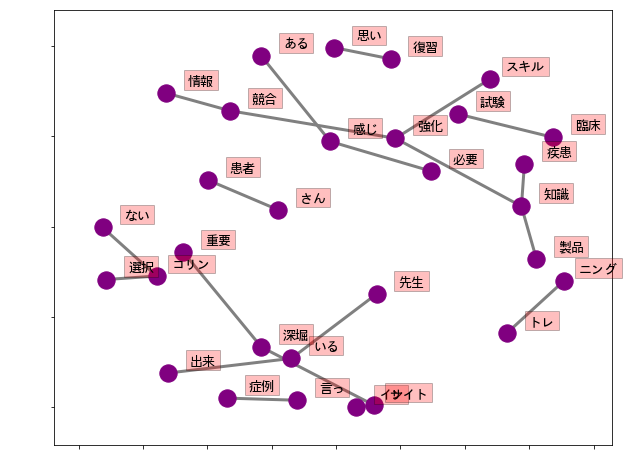

In [72]:
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
#                  node_size=[d['count']*100 for (n,d) in G.nodes(data=True)],
#                  node_size=[one_word_list.count(n)*1000 for (n) in G.nodes(data=True)],
#                  node_size=[10,100,1000],
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

### co-occurrence network

In [73]:
vocab = {}
target_words = word_cnt_df[word_cnt_df['cnt'] > 3]['word'].as_matrix()
for word in target_words:
    if word not in vocab:
        vocab[word] = len(vocab)

re_vocab = {}
for word, i in vocab.items():
    re_vocab[i] = word
    
len(vocab)

38

In [74]:
# vocab
# re_vocab

In [75]:
# tweet_combinations

In [76]:
tweet_combinations = [list(itertools.combinations(words, 2)) for words in tweet_words]
combination_matrix = np.zeros((len(vocab), len(vocab)))

for tweet_comb in tweet_combinations:
    for comb in tweet_comb:
        if comb[0] in target_words and comb[1] in target_words:
            combination_matrix[vocab[comb[0]], vocab[comb[1]]] += 1
            combination_matrix[vocab[comb[1]], vocab[comb[0]]] += 1
        
for i in range(len(vocab)):
    combination_matrix[i, i] /= 2
        
len(combination_matrix)
print(combination_matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [77]:
jaccard_matrix = 1 - distance.cdist(combination_matrix, combination_matrix, 'jaccard')
#计算两个输入集合中每对之间的距离。
jaccard_matrix

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.125     ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.16666667],
       [0.        , 0.        , 1.        , ..., 0.        , 0.11111111,
        0.09090909],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.2       ,
        0.        ],
       [0.        , 0.        , 0.11111111, ..., 0.2       , 1.        ,
        0.        ],
       [0.125     , 0.16666667, 0.09090909, ..., 0.        , 0.        ,
        1.        ]])

In [78]:
nodes = []

for i in range(len(vocab)):
    for j in range(i+1, len(vocab)):
        jaccard = jaccard_matrix[i, j]
        if jaccard > 0:
            nodes.append([re_vocab[i], re_vocab[j], word_cnt[re_vocab[i]], word_cnt[re_vocab[j]], jaccard])
            
len(nodes)

545

In [79]:
# nodes

In [89]:
# G.edges
# G.nodes

In [87]:
# for (n,d) in G.nodes(data=True):
#     print(n,d)

In [82]:
# node_size

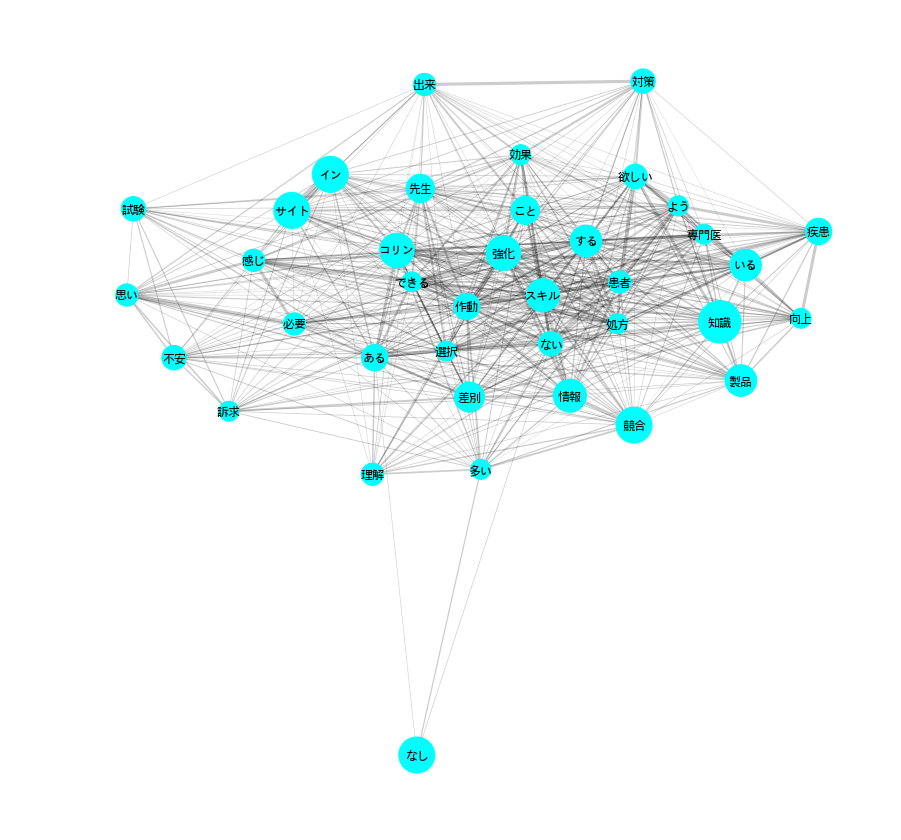

In [88]:
G = nx.Graph()
G.nodes(data=True)

for pair in nodes:
    node_x, node_y, node_x_cnt, node_y_cnt, jaccard = pair[0], pair[1], pair[2], pair[3], pair[4]
    if not G.has_node(node_x):
        G.add_node(node_x, count=node_x_cnt)
    if not G.has_node(node_y):
        G.add_node(node_y, count=node_y_cnt)
    if not G.has_edge(node_x, node_y):
        G.add_edge(node_x, node_y, weight=jaccard)
        
plt.figure(figsize=(15,15))
pos = nx.spring_layout(G, k=0.1)

node_size = [d['count']*100 for (n,d) in G.nodes(data=True)]
nx.draw_networkx_nodes(G, pos, node_color='cyan', alpha=1.0, node_size=node_size)
nx.draw_networkx_labels(G, pos, fontsize=14, font_family='Droid Sans Japanese')

edge_width = [d['weight']*10 for (u,v,d) in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, alpha=0.2, edge_color='black', width=edge_width)

plt.axis('off')
plt.show()

In [84]:
wordcloud_text=' '.join(one_word_list)

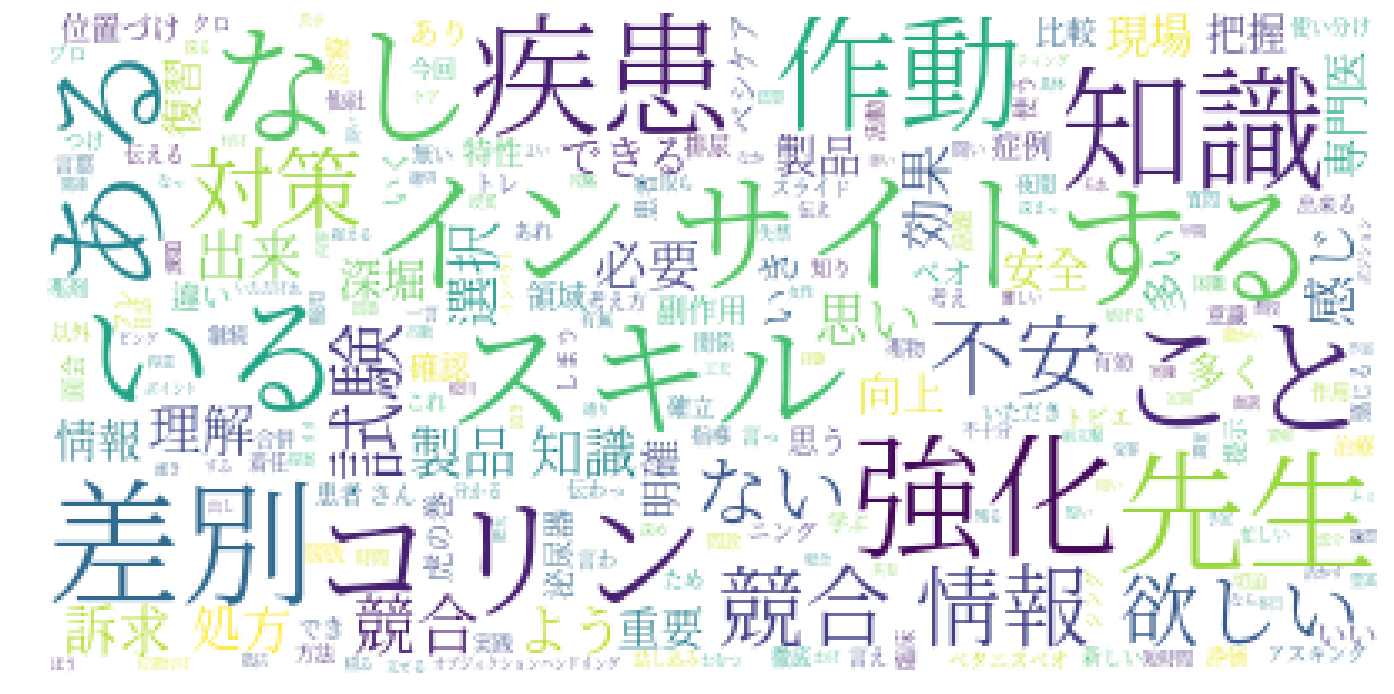

In [85]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def word_cloud(text_list):

    wc = WordCloud(max_words=2000,
                max_font_size=40,
                font_path='../input/chinesewordcloud/SourceHanSerifK-Light.otf',
                background_color='white',
#                 width=800,  # 生成图片的大小
#                 height=600,
                random_state=42,
                relative_scaling=0)
    wc.generate(text_list)
    # Plot
    plt.figure(figsize=(24.0,16.0))
    plt.axis('off')
    plt.imshow(wc)
    plt.show()
word_cloud(wordcloud_text)

In [86]:
plt.savefig('plot.png')